<a href="https://colab.research.google.com/github/charlie-aashutosh/charlie/blob/master/Content_Based_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
files=files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv
Saving tmdb_movies_data.csv to tmdb_movies_data.csv


In [5]:
credits=pd.read_csv("tmdb_5000_credits.csv")

In [6]:
movies_df=pd.read_csv("tmdb_movies_data.csv")

In [7]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [9]:

print("Credits:",credits.shape)
print("Movies Dataframe:",movies_df.shape)

Credits: (4803, 4)
Movies Dataframe: (10866, 21)


In [10]:
credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
movies_df_merge.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast_x,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,title,cast_y,crew
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Jurassic World,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de..."
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,Insurgent,"[{""cast_id"": 0, ""character"": ""Beatrice \""Tris\...","[{""credit_id"": ""55c1cd8b9251410f1900448b"", ""de..."
3,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,Furious 7,"[{""cast_id"": 17, ""character"": ""Dominic Toretto...","[{""credit_id"": ""52fe4cc8c3a36847f823e699"", ""de..."
4,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,124199945.4,4.903142e+08,The Revenant,"[{""cast_id"": 1, ""character"": ""Hugh Glass"", ""cr...","[{""credit_id"": ""568fae529251411895001f8d"", ""de..."


In [11]:
movies_cleaned_df = movies_df_merge.drop(columns=['homepage','production_companies'])
movies_cleaned_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast_x,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,title,cast_y,crew
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Jurassic World,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de..."
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,Insurgent,"[{""cast_id"": 0, ""character"": ""Beatrice \""Tris\...","[{""credit_id"": ""55c1cd8b9251410f1900448b"", ""de..."
3,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,Furious 7,"[{""cast_id"": 17, ""character"": ""Dominic Toretto...","[{""credit_id"": ""52fe4cc8c3a36847f823e699"", ""de..."
4,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/2015,3929,7.2,2015,124199945.4,4.903142e+08,The Revenant,"[{""cast_id"": 1, ""character"": ""Hugh Glass"", ""cr...","[{""credit_id"": ""568fae529251411895001f8d"", ""de..."


In [12]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3754 entries, 0 to 3753
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3754 non-null   int64  
 1   imdb_id         3754 non-null   object 
 2   popularity      3754 non-null   float64
 3   budget          3754 non-null   int64  
 4   revenue         3754 non-null   int64  
 5   original_title  3754 non-null   object 
 6   cast_x          3753 non-null   object 
 7   director        3753 non-null   object 
 8   tagline         3357 non-null   object 
 9   keywords        3574 non-null   object 
 10  overview        3754 non-null   object 
 11  runtime         3754 non-null   int64  
 12  genres          3754 non-null   object 
 13  release_date    3754 non-null   object 
 14  vote_count      3754 non-null   int64  
 15  vote_average    3754 non-null   float64
 16  release_year    3754 non-null   int64  
 17  budget_adj      3754 non-null   f

In [13]:
# Using Weighted average for each movie's Average Rating
v=movies_cleaned_df['vote_count']
R=movies_cleaned_df['vote_average']
C=movies_cleaned_df['vote_average'].mean()
m=movies_cleaned_df['vote_count'].quantile(0.70)

In [14]:
movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)

In [15]:
movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)

In [16]:

movie_sorted_ranking=movies_cleaned_df.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1560,The Shawshank Redemption,5754,8.4,8.242652,7.192039
2738,The Godfather,3970,8.3,8.088557,5.738034
1008,The Dark Knight,8432,8.1,8.004704,8.466668
724,Fight Club,5923,8.1,7.967056,8.947905
1559,Pulp Fiction,5343,8.1,7.953695,8.093754
1561,Forrest Gump,4856,8.1,7.940211,6.715966
157,Interstellar,6498,8.0,7.884273,24.949134
177,Whiplash,2372,8.2,7.883170,4.780419
542,Inception,9767,7.9,7.825579,9.363643
3633,Schindler's List,2632,8.1,7.824077,2.377288


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


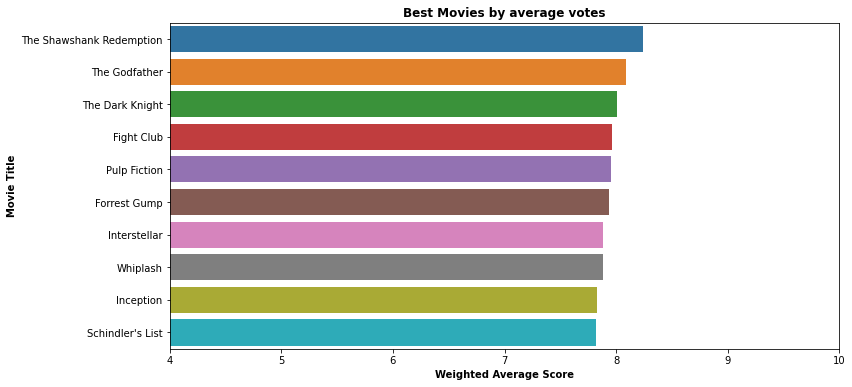

In [18]:
weight_average=movie_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')


In [24]:
#Content Based Recommendation System
#Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [25]:
movies_cleaned_df.head(10)['overview']

0    Twenty-two years after the events of Jurassic ...
1    An apocalyptic story set in the furthest reach...
2    Beatrice Prior must confront her inner demons ...
3    Deckard Shaw seeks revenge against Dominic Tor...
4    In the 1820s, a frontiersman, Hugh Glass, sets...
5    The year is 2029. John Connor, leader of the r...
6    During a manned mission to Mars, Astronaut Mar...
7    Minions Stuart, Kevin and Bob are recruited by...
8    Growing up can be a bumpy road, and it's no ex...
9    A cryptic message from Bondâ€™s past sends him...
Name: overview, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies_cleaned_df['overview'] = movies_cleaned_df['overview'].fillna('')

In [27]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned_df['overview'])

In [28]:

tfv_matrix

<3754x8463 sparse matrix of type '<class 'numpy.float64'>'
	with 95653 stored elements in Compressed Sparse Row format>

In [29]:
tfv_matrix.shape

(3754, 8463)

In [30]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [31]:
sig[0]

array([0.76164378, 0.76159458, 0.76159416, ..., 0.76159494, 0.76159416,
       0.76159416])

In [32]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned_df.index, index=movies_cleaned_df['original_title']).drop_duplicates()

In [33]:

indices

original_title
Jurassic World              0
Mad Max: Fury Road          1
Insurgent                   2
Furious 7                   3
The Revenant                4
                         ... 
The Last Waltz           3749
A Man for All Seasons    3750
Batman                   3751
Torn Curtain             3752
Harper                   3753
Length: 3754, dtype: int64

In [35]:
indices['Avatar']

345

In [37]:
sig[490]

array([0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [38]:
list(enumerate(sig[indices['Avatar']]))

[(0, 0.7615941559557649),
 (1, 0.7615955240836315),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615953268970266),
 (7, 0.7615941559557649),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.761596382488442),
 (14, 0.7615941559557649),
 (15, 0.7615962859365251),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615949465715801),
 (19, 0.7615954554478186),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615958029597584),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.7615

In [39]:
sorted(list(enumerate(sig[indices['Avatar']])), key=lambda x: x[1], reverse=True)

[(345, 0.7616437762498844),
 (725, 0.7616050413458129),
 (1288, 0.7616029287010413),
 (632, 0.7616027049634495),
 (3267, 0.76160256261327),
 (2820, 0.7616011823963523),
 (1822, 0.7616004137196657),
 (1178, 0.7615994702405349),
 (238, 0.7615994012468434),
 (3378, 0.7615987793621294),
 (3120, 0.761598700795178),
 (175, 0.7615986227567958),
 (1301, 0.7615983999817948),
 (1378, 0.7615982599020947),
 (2836, 0.7615982458576476),
 (2490, 0.7615982442120708),
 (969, 0.7615981781634287),
 (1397, 0.7615981557895475),
 (2457, 0.7615981165180417),
 (1517, 0.7615980950588972),
 (307, 0.7615980891812633),
 (1429, 0.7615980823573043),
 (2799, 0.7615980783298444),
 (70, 0.7615979970770916),
 (2873, 0.7615979549127325),
 (2781, 0.7615978351365127),
 (594, 0.7615978303912644),
 (3689, 0.7615978273386733),
 (3015, 0.7615978086694078),
 (975, 0.7615976668642543),
 (289, 0.761597660198997),
 (1020, 0.7615976595690666),
 (2097, 0.7615976234646966),
 (134, 0.7615975259755519),
 (546, 0.7615974914936323),
 (2

In [40]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_cleaned_df['original_title'].iloc[movie_indices]

In [41]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Spy Kids')


1463      Spy Kids 2: Island of Lost Dreams
1860                Spy Kids 3-D: Game Over
1320    Spy Kids: All the Time in the World
821                             In Too Deep
2709                               Mr. 3000
889               Jimmy Neutron: Boy Genius
2581                        The Incredibles
404                              Bride Wars
1117                     Revolutionary Road
233                  Escobar: Paradise Lost
Name: original_title, dtype: object

In [42]:
give_rec('Hulk')

234                          Wild
1020          The Incredible Hulk
1791               Bruce Almighty
855              Doug's 1st Movie
2913             My Name Is Bruce
2510           DOA: Dead or Alive
14              The Hateful Eight
3220      Dude, Whereâ€™s My Car?
3604    Gremlins 2: The New Batch
341                    Eraserhead
Name: original_title, dtype: object